# Storage and retrieval of entangled OAM states

The state being stored:
$$
|\psi\rangle = \left(|\ell\rangle_1|-\ell\rangle_2 + |-\ell\rangle_1|\ell\rangle_2\right)/\sqrt{2}
$$

which can be written in the Fock state basis as:

$$
|\psi\rangle = \frac{1}{\sqrt{2}}\left(|1\rangle_{1,\ell}|0\rangle_{1,-\ell}|0\rangle_{2,\ell}|1\rangle_{2,-\ell} + |0\rangle_{1,\ell}|1\rangle_{1,-\ell}|1\rangle_{2,\ell}|0\rangle_{2,-\ell}\right)
$$.

The Hamiltonain of the system is given by:

$$
\hat{H}_1/\hbar  = -\hat{a}^\dagger_{1,j}\hat{a}_{1,j}\tilde{\Delta}_{1,j} + \omega_{c_1}\hat{c}^\dagger_1\hat{c}_1 + \omega_{d_1}\hat{d}^\dagger_1\hat{d}_1 -\tilde{G}_{1,\ell}(\hat{a}_{1,\ell}^\dagger\hat{c}_1 + \hat{a}_{1,\ell}\hat{c}^\dagger_1)\\
%
- \tilde{G}_{1,-\ell}(\hat{a}_{1,-\ell}^\dagger\hat{d}_1 + \hat{a}_{1,-\ell}\hat{d}^\dagger_1) +4\tilde{g}N( \hat{c}^\dagger_1 \hat{c}_1 + \hat{d}^\dagger_1 \hat{d}_1 )\\
% 
+ 2\tilde{g}N(\hat{c}_1 \hat{d}_1 e^{-i\bar{\delta}_1 t} + \hat{c}^\dagger_1 \hat{d}^\dagger_1 e^{i\bar{\delta}_1 t})
$$

$$
\hat{H}_2/\hbar  = -\hat{a}^\dagger_{2,j}\hat{a}_{2,j}\tilde{\Delta}_{2,j} + \omega_{c_2}\hat{c}^\dagger_2\hat{c}_2 + \omega_{d_2}\hat{d}^\dagger_1\hat{d}_2 -\tilde{G}_{2,\ell}(\hat{a}_{2,\ell}^\dagger\hat{c}_2 + \hat{a}_{2,\ell}\hat{c}^\dagger_2)\\
%
- \tilde{G}_{2,-\ell}(\hat{a}_{2,-\ell}^\dagger\hat{d}_2 + \hat{a}_{2,-\ell}\hat{d}^\dagger_2) +4\tilde{g}N( \hat{c}^\dagger_2 \hat{c}_2 + \hat{d}^\dagger_2 \hat{d}_2 )\\
% 
+ 2\tilde{g}N(\hat{c}_2 \hat{d}_2 e^{-i\bar{\delta}_2 t} + \hat{c}^\dagger_2 \hat{d}^\dagger_2 e^{i\bar{\delta}_2 t})
$$

Such that,

$$
\hat{H} = \hat{H}_1 + \hat{H}_2
$$


#### How to measure the entanglement of the states, $|\psi\rangle_1$ or $|\psi\rangle_2$

Both, $|\psi\rangle_1$ and $|\psi\rangle_2$ are pure states. To identify entanglement of a pure state we observe the reduced density  matrix. The state is entangled if the reduced density matrix represents a  mixed state and is separable if the reduced density matrix remains a pure state.

#### Von Neuman Entropy

According to this measure, the  degree of entanglement of a subsystem with another subsystem is simply direct proportional to its entropy computed from the corresponding reduced  density matrix. It can be proved that the entropies of both subsystems are  the same, so the amounts of entanglement associated with them are the  same. 

#### Peres-Horodecki criterion
The  Peres-Horodecki criterion states that all of the eigenvalues of the partialtransposed density matrix must not be negative for every separable state.  For qubit systems, this was shown to be equivalent to the statement that  there must be, at least, one negative eigenvalue for every entangled density  matrix being partial transposed. The idea of negativity is that the degree of entanglement reflects in the summation of the negative eigenvalues

One dimensionality satisfied
RHS is greater then LHS by, 11.816 times
drive power =  8.584293215184512e-10
eta_l and eta_p :  450.0547675537846 4.500547675537846
omega_c =  172.268
omega_d =  126.564
omega_c-omega_d =  45.704
g_prime/gamma_0 =  0.053
number of thermal photons in atomic modes c and d:  2.963996425317431e-180 1.264118188079506e-132


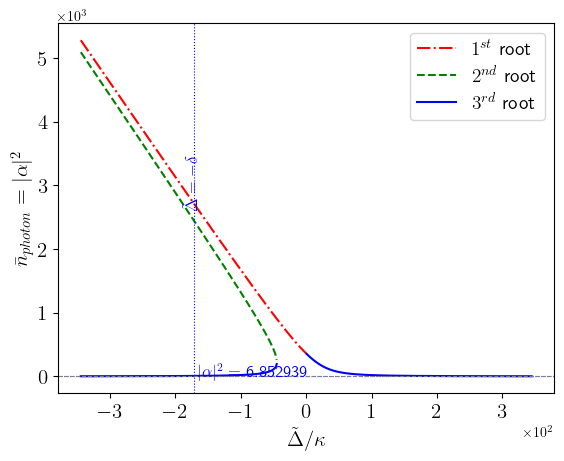

photon number at (delta_tilde = -small_delta) is 6.866789
Q_cs = -0.08776534651866302 and Q_ds = -0.1194450030196379
|alpha_s|^2 (photon number) =  6.853
G_tilde =  4.08
Criterion satisfied
ratio of RHS by LHS:  3.086464385691955
LHS 1898.0997665922864
K.E 5522.4173300773045
Coll 336.0000000000001
scattering rate less than 1
scattering rate 5.768559671149552e-06
Real part of the eigenvalues of the Jacobian matrix are: [-0.24721298 -0.24708444 -0.00562817 -0.2446426  -0.24980958 -0.00563889]
Eigen values with positive real part []
The system is stable.


In [1]:
%run ./bistability_plot.ipynb

#### Libraries

In [2]:
import numpy as np
from qutip import *


#### Parameters

In [3]:
# Define constants
g       = np.round(g_prime,3)

omega_c = np.round(omega_c,3)
omega_d = np.round(omega_d,3)

delta_1 = np.round(omega_c + 4*g_tilde*Na, 3)     # small delta = omega_p - omega_l 
delta_2 = np.round(omega_d + 4*g_tilde*Na, 3)

Delta_1 = -delta_1
Delta_2 = -delta_2

boost_coup_const = np.round(np.abs(G_tilde_val),3)


#### All time dependent function definitions

In [4]:
# Time-dependent functions
def switch_function(t, t_start, t_off, off_duration, smoothness):
    """
    Defines a smooth function that switches on and off based on given parameters.

    arguments:
    t: Time at which the function is evaluated.
    t_on: The time at which the function switches on.
    t_off: The time at which the function switches off.
    offduration: The duration for which the function stays off.
    smoothness: Controls how smoothly the function switches off and on.

    Returns:
    The value of the function at time t.
    """
    def switching_on(t_on):
        return 0.5 * (1 + np.tanh(smoothness * (t - t_on)))
    
    def switching_off(t_off):
        return 0.5 * (1 - np.tanh(smoothness * (t - t_off)))

    return switching_on(t_start)*switching_off(t_off) + switching_on(t_off + off_duration)

def Gt(t, args):
    t_start = args['t_start']
    t_off   = args['t_off']
    off_duration = args['off_duration']
    smoothness   = args['smoothness']
    G0           = args['boost_coup_const']
    return G0*switch_function(t, t_start, t_off, off_duration, smoothness)

# Time-dependent coefficients
def f_20(t, args):
    delta_1 = args['delta_1']
    delta_2 = args['delta_2']
    return np.exp(-1j * (delta_1 + delta_2) * t)

def f_21(t, args):
    delta_1 = args['delta_1']
    delta_2 = args['delta_2']
    return np.exp(1j * (delta_1 + delta_2) * t)


def thermal_state(n_th, dim):
    """Generate a thermal state with mean phonon number n_th."""
    return thermal_dm(dim, n_th)


def four_mode_entanlged_state(dim):
    """Generate a four mode entangled state."""
    I = qeye(dim)

    # Define basis states in the dim dimensional space
    zero = fock(dim, 0)   # |0⟩ in dim dimensional Hilbert space
    one  = fock(dim, 1)   # |1⟩ in dim dimensional Hilbert space

    # Define the composite state
    psi = tensor(one, zero, zero, one) + tensor(zero, one, one, zero)

    # Normalize the state
    psi = psi.unit()

    return ket2dm(psi)    # ket2dm() function takes a state vector and calculates its density matrix

# Unitary transformation to get rid of any global phase after reading
def unitary_rotation_operator (theta_1, theta_2, theta_3, theta_4, dim):
    
    # Define creation and annihilation operators for each mode
    a = destroy(dim)  # Mode a
    b = destroy(dim)  # Mode b
    c = destroy(dim)  # Mode c
    d = destroy(dim)  # Mode d

    # Define number operators
    num_a = a.dag() * a
    num_b = b.dag() * b
    num_c = c.dag() * c
    num_d = d.dag() * d

    # Define the rotation operators
    U_a = (-1j * theta_1 * num_a).expm()  # Rotation for mode a
    U_b = (-1j * theta_2 * num_b).expm()  # Rotation for mode b
    U_c = (-1j * theta_3 * num_c).expm()  # Rotation for mode a
    U_d = (-1j * theta_4 * num_d).expm()  # Rotation for mode b

    # Define the total rotation operator (tensor product)
    U_total = tensor(U_a, U_b, U_c, U_d)

    return U_total

import numpy as np

def negativity_customized(rho, mask, method='tracenorm', logarithmic=False):
    
    import numpy as np

    """
    Compute the negativity for a multipartite quantum system described
    by the density matrix rho. The mask argument consists an boolian array, example: [0,0,1,1]
    which is the mask for a four partite system. Here, 1,1 at third and fourth places means that the partial transpose
    needs to taken over modes 3 and 4

    """
    rho_pt = partial_transpose(rho, mask)

    if method == 'tracenorm':
        N = ((rho_pt.dag() * rho_pt).sqrtm().tr().real - 1)/2.0
    elif method == 'eigenvalues':
        l = rho_pt.eigenenergies()
        N = ((abs(l)-l)/2).sum()
    else:
        raise ValueError("Unknown method %s" % method)

    if logarithmic:
        return np.log2(2 * N + 1)
    else:
        return N


def compute_log_negativity(rho):
    import numpy as np
    # rho is the density matrix corresponding to the composite optical state, which contains 4 modes, 
    """Compute the logarithmic negativity between qubits (12|34)."""
    
    # Perform partial transpose on qubits 3 and 4 (subsystem B)
    rho_PT = partial_transpose(rho, [0, 0, 1,1])  # 0,0, 1, 1 indicates that partial transpose is taken over modes 3 and 4 
    
    # Compute negativity: sum of absolute values of negative eigenvalues
    eigvals = rho_PT.eigenenergies()
    negativity = sum(abs(eig) for eig in eigvals if eig < 0)
    
    # Logarithmic negativity
    log_neg = np.log2(1 + 2 * negativity)
    return log_neg


#### Define the Hilbert space and Hamiltonian

In [5]:
# Define annihilation fullerators for each mode
N_op = 2  # Truncation level for Fock space
N_mech = 2

# Modes a1, a2, a3, a4, c1, d1, c2, d2
a10 = destroy(N_op)
a11 = destroy(N_op)
a20 = destroy(N_op)
a21 = destroy(N_op)
c1  = destroy(N_mech)
d1  = destroy(N_mech)
c2  = destroy(N_mech)
d2  = destroy(N_mech)

# Create the Hilbert space by tensoring the operators
a10_full = tensor(a10, qeye(N_op), qeye(N_op), qeye(N_op), qeye(N_mech), qeye(N_mech), qeye(N_mech), qeye(N_mech))
a11_full = tensor(qeye(N_op), a11, qeye(N_op), qeye(N_op), qeye(N_mech), qeye(N_mech), qeye(N_mech), qeye(N_mech))
a20_full = tensor(qeye(N_op), qeye(N_op), a20, qeye(N_op), qeye(N_mech), qeye(N_mech), qeye(N_mech), qeye(N_mech))
a21_full = tensor(qeye(N_op), qeye(N_op), qeye(N_op), a21, qeye(N_mech), qeye(N_mech), qeye(N_mech), qeye(N_mech))

c1_full  = tensor(qeye(N_op), qeye(N_op), qeye(N_op), qeye(N_op), c1, qeye(N_mech), qeye(N_mech), qeye(N_mech))
d1_full  = tensor(qeye(N_op), qeye(N_op), qeye(N_op), qeye(N_op), qeye(N_mech), d1, qeye(N_mech), qeye(N_mech))

c2_full  = tensor(qeye(N_op), qeye(N_op), qeye(N_op), qeye(N_op), qeye(N_mech), qeye(N_mech), c2, qeye(N_mech))
d2_full  = tensor(qeye(N_op), qeye(N_op), qeye(N_op), qeye(N_op), qeye(N_mech), qeye(N_mech), qeye(N_mech), d2)


# Number operators in composite space
n_a10_full = a10_full.dag() * a10_full
n_a11_full = a11_full.dag() * a11_full
n_a20_full = a20_full.dag() * a20_full
n_a21_full = a21_full.dag() * a21_full
n_c1_full  = c1_full.dag() * c1_full
n_d1_full  = d1_full.dag() * d1_full
n_c2_full  = c2_full.dag() * c2_full
n_d2_full  = d2_full.dag() * d2_full

# Define the Hamiltonian components
# time independent parts
# optical part
H_sig = -n_a10_full * Delta_1 - n_a11_full * Delta_2
H_idl = -n_a20_full * Delta_1 - n_a21_full * Delta_2

# BEC part
H_bec_1 = n_c1_full * omega_c + n_d1_full * omega_d + 2 * g * (n_c1_full + n_d1_full)
H_bec_2 = n_c2_full * omega_c + n_d2_full * omega_d + 2 * g * (n_c2_full + n_d2_full)

# time dependent parts
# beam splitter part
H_10 = -(a10_full.dag() * c1_full + a10_full * c1_full.dag()) #- (a10_full.dag() * d1_full + a10_full * d1_full.dag()) 
H_11 = -(a11_full.dag() * d1_full + a11_full * d1_full.dag()) #- (a11_full.dag() * c1_full + a11_full * c1_full.dag())

H_20 = -(a20_full.dag() * c2_full + a20_full * c2_full.dag()) #- (a20_full.dag() * d2_full + a20_full * d2_full.dag())
H_21 = -(a21_full.dag() * d2_full + a21_full * d2_full.dag()) #- (a21_full.dag() * c2_full + a21_full * c2_full.dag())

# Collisional terms
H_coll_10 = g*c1_full*d1_full
H_coll_11 = g*c1_full.dag()*d1_full.dag()
H_coll_20 = g*c2_full*d2_full
H_coll_21 = g*c2_full.dag()*d2_full.dag()

# Full Hamiltonian
# H = [H_sig, H_idl, H_bec_1, H_bec_2,
#     [H_10, Gt],[H_11, Gt], [H_20, Gt],[H_21, Gt],
#     [H_coll_10, f_20],[H_coll_11, f_21], [H_coll_20, f_20],[H_coll_21, f_21]
# ]

H = [
[H_10, Gt],[H_11, Gt], 
[H_20, Gt],[H_21, Gt],
]

c_ops_list = [
    np.sqrt(kappa) * a10_full, np.sqrt(kappa) * a11_full,
    np.sqrt(kappa) * a20_full, np.sqrt(kappa) * a21_full,
    np.sqrt(gamma_m * (nth_c + 1)) * c1_full, np.sqrt(gamma_m * nth_c) * c1_full.dag(),
    np.sqrt(gamma_m * (nth_d + 1)) * d1_full, np.sqrt(gamma_m * nth_d) * d1_full.dag(),
    np.sqrt(gamma_m * (nth_c + 1)) * c2_full, np.sqrt(gamma_m * nth_c) * c2_full.dag(),
    np.sqrt(gamma_m * (nth_d + 1)) * d2_full, np.sqrt(gamma_m * nth_d) * d2_full.dag()
]

#### Intialization

Define the density matrix of the composite system at time, $t = 0$

In [6]:
# Initial state
rho_opt_init  = four_mode_entanlged_state(N_op)
rho_mech_init = tensor(thermal_state(nth_c, N_mech), thermal_state(nth_d, N_mech), thermal_state(nth_c, N_mech), thermal_state(nth_d, N_mech))
initial_state = tensor(rho_opt_init, rho_mech_init)

In [7]:
# Time range and parameters
period = np.pi / (2 * boost_coup_const)

t_start      = -100
t_off        = period
off_duration = 10*period
t_on         = t_off + off_duration
smoothness   = 100    # this parameter determins how smoothly the drive field is switched off and then back on, decreasing its value leads to increase in smoothness

t_write      = t_off
t_read       = t_on + period

t_eval = [0, t_read]

#### Solution of Master Equation

In [8]:
# dictionary for arguments
args_dic = {'t_start': t_start, 't_off': t_off, 'off_duration': off_duration, 'smoothness': smoothness, 'delta_1': delta_1, 'delta_2': delta_2, 'boost_coup_const': boost_coup_const}

# dictionary for options
options_dic   = {"atol":1e-5, "rtol":1e-4, "progress_bar": True, "store_states": True, "nsteps": 20e3}

# Solve the master equation using mesolve
result = mesolve(H, initial_state, t_eval, c_ops = c_ops_list, e_ops = None, args = args_dic, options = options_dic)  # in "e_ops" ops stands for operators, "e" stands for expectation

100.0%. Run time:   1.04s. Est. time left: 00:00:00:00
Total run time:   1.04s


# Plots

#### Configure matplotlib

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# enable TeX fonts
plt.rcParams['text.usetex'] = True

# Set the global font size for all legends
mpl.rcParams['legend.fontsize'] = 14

# Set the global font size for all axis labels
mpl.rcParams['axes.labelsize'] = 14

# Set the global font style for all axis  labels
plt.rcParams['font.family'] = 'Times New Roman'

#### Plot of expectation value of number operators

#### Retrieval fidelity

In [10]:
# rotate the state
theta_1 = -np.pi/2
theta_2 = -np.pi/2
theta_3 = -np.pi/2
theta_4 = -np.pi/2

U_inverse = unitary_rotation_operator(2*theta_1, 2*theta_2, 2*theta_3, 2*theta_4, N_op).inv()   # take the inverse of the rotation matrix since we want to revert the phase change

# Define retrieved density matrix
rho_opt_read  = result.states[1].ptrace([0,1,2,3])

# rotate the final state
rho_opt_prime = U_inverse*rho_opt_read*U_inverse.dag()       # or np.dot(U_total, psi_norm)

fidelity_val = fidelity(rho_opt_init, rho_opt_prime) 

print("Retreival fidelity:", np.round(fidelity_val, 3))

Retreival fidelity: 0.685


#### Entanglement

In [11]:
# Compute entanglement measure (logarithmic negativity) for the 12|34 bipartition
#-------------------------------------------------------------------------------------
logneg_12_34_int  = compute_log_negativity(rho_opt_init)
logneg_12_34_finl = compute_log_negativity(rho_opt_prime)


# Von Neuman entropy
# -----------------------------------

# Define subsystem 1 as the first two qubits (1,ℓ) and (1,-ℓ)
# We trace out the last two qubits (2,ℓ) and (2,-ℓ)
rho_1_init = rho_opt_init.ptrace([0, 1])  # Partial trace over qubits 2 and 3
rho_1_read = rho_opt_read.ptrace([0, 1]) 

# Compute the Von Neumann entropy S(ρ_1)
entropy_int = entropy_vn(rho_1_init, base=2)  # Use log base 2
entropy_read = entropy_vn(rho_1_read, base=2)  # Use log base 2

# Print the result
print(f"Von Neumann Entropy of Subsystem 1 at t = 0: {entropy_int:.4f}")
print(f"Von Neumann Entropy of Subsystem 1 at t = t_read: {entropy_read:.4f}")


# Display the result
print(f"Logarithmic Negativity (12|34 partition) at t = 0: {logneg_12_34_int}")
print(f"Logarithmic Negativity (12|34 partition) after reading: {logneg_12_34_finl}")


Von Neumann Entropy of Subsystem 1 at t = 0: 1.0000
Von Neumann Entropy of Subsystem 1 at t = t_read: 1.5840
Logarithmic Negativity (12|34 partition) at t = 0: 0.9999999999999999
Logarithmic Negativity (12|34 partition) after reading: 0.5552823192709326


#### Purity of the state
1. $Tr\left[\hat{\rho}\right] = 1$ for all density matrix
2. $Tr\left[\hat{\rho}^2\right] = 1$ for pure state
3. $Tr\left[\hat{\rho}^2\right] \lt 1$ for mixed state

In [12]:
print("trace of the intial optical DM squared", (rho_opt_init*rho_opt_init).tr())
print("trace of the retrieved optical DM squared", (rho_opt_prime*rho_opt_prime).tr())

trace of the intial optical DM squared 0.9999999999999996
trace of the retrieved optical DM squared 0.27671170347137175


In [13]:
rho_bec_int   = initial_state.ptrace([4,5,6,7])
print("trace of the initial atomic DM squared", (rho_bec_int*rho_bec_int).tr())
rho_bec_read  = result.states[1].ptrace([4,5,6,7])
print("trace of the retrieved atomic DM squared", (rho_bec_read*rho_bec_read).tr())

trace of the initial atomic DM squared 0.9999999999999996
trace of the retrieved atomic DM squared 0.9926696924273306


#### Plot density matrices

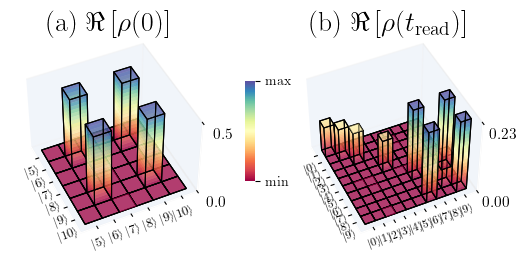

In [14]:
from matplotlib import cm, colors

%run ./density_matrix_plotter.ipynb

# Create figure
fig = plt.figure(figsize=(5, 2.5))

# Define the axes
axes = []  # List to store subplot axes
nrows = 1
ncols = 2
for i in range(1, nrows*ncols + 1):  # Indices from 1 to 12
    ax = fig.add_subplot(nrows, ncols, i, projection='3d')
    axes.append(ax)  # Store the axis in the list

# Enable this for plotting real and imaginary parts side by side
    
plot_dm(axes[0], rho_opt_init, xslice = [5,11], yslice = [5,11], view = [45,-25], ticks_font_size = [9,9,11], plot_title = r"(a) $\Re\left[\rho(0)\right]$")
plot_dm(axes[1], rho_opt_prime, xslice = [0,10], yslice = [0,10], view = [45,-25], ticks_font_size = [8,8,11], plot_title = r"(b) $\Re\left[\rho(t\textsubscript{read})\right]$")


# Customize the colorbar
#####################################################
# Color normalization and colorbar
vmin, vmax = 0, 1
norm = colors.Normalize(vmin=vmin, vmax=vmax)

# colorbar position on the entire plot
cbar_ax = fig.add_axes([0.47, 0.3, 0.02, 0.4]) # [left, bottom, width, height]

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.Spectral), cax=cbar_ax)

# Custom tick locations and labels
tick_locs = [0, 1]
tick_labels = ['min', 'max']

# Apply custom ticks and labels
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(tick_labels)

# Remove border
for spine in cbar.ax.spines.values():
    spine.set_visible(False)

# Change font size of tick labels
cbar.ax.tick_params(labelsize=10)

#######################################################
# Customize boundary of the whole plot
fig.subplots_adjust(left=0.0, right=0.96, top=0.92, bottom=0.02, wspace=0.4, hspace=0.2)

# Make figure background transparent
fig.patch.set_alpha(0.0)

# save the plot to a file
filename = 'figure3ii.svg'
plt.savefig(filename, format='svg', dpi=32,transparent=True)

# Show the plot
plt.show()